# kNN: k Nearest Neighbors

Input:      inX: vector to compare to existing dataset (1xN)
           dataSet: size m data set of known vectors (NxM)
           labels: data set labels (1xM vector)
           k: number of neighbors to use for comparison (should be an odd number)
           
Output:     the most popular class label

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
%matplotlib inline

In [2]:
def file2matrix(filename):
    fr = open(filename)
    numberOfLines = len(fr.readlines())         
    returnMat = np.zeros((numberOfLines,3))        
    classLabelVector = []                      
    fr = open(filename)
    index = 0
    for line in fr.readlines():                   
        line = line.strip()
        listFromLine = line.split('\t')
        returnMat[index,:] = listFromLine[0:3]       
        classLabelVector.append(int(listFromLine[-1]))   
        index += 1
    fr.close()
    return returnMat,classLabelVector   

Mat,Label = file2matrix('./datingSet.txt')

In [3]:
def autoNorm(dataSet): 
    dataSet = np.array(dataSet)
    minVals = dataSet.min(0)      
    maxVals = dataSet.max(0)
    ranges = maxVals - minVals
    normDataSet = np.zeros(np.shape(dataSet))    
    m = dataSet.shape[0]
    normDataSet = dataSet - np.tile(minVals, (m,1))     
    normDataSet = normDataSet/np.tile(ranges, (m,1))   
    return normDataSet, ranges, minVals

normSet,Ranges,MinVals = autoNorm(Mat)
normSet

array([[0.44832535, 0.39805139, 0.56233353],
       [0.15873259, 0.34195467, 0.98724416],
       [0.28542943, 0.06892523, 0.47449629],
       ...,
       [0.29115949, 0.50910294, 0.51079493],
       [0.52711097, 0.43665451, 0.4290048 ],
       [0.47940793, 0.3768091 , 0.78571804]])

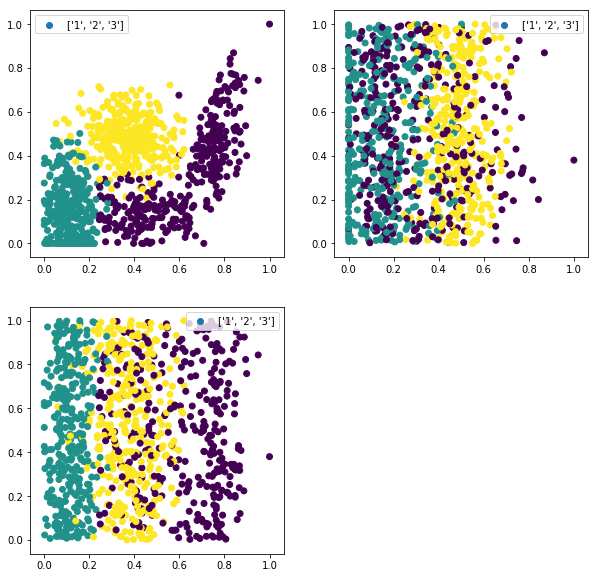

In [4]:
fig = plt.figure(figsize = (10,10))
ax1 = fig.add_subplot(2,2,1)
ax1.scatter(normSet[:,0],normSet[:,1],c= 15 * np.array(Label),label = [str(each) for each in list(np.unique(np.array(Label).reshape(-1,1)))])
ax1.legend(loc = 'best')
ax2 = fig.add_subplot(2,2,2)
ax2.scatter(normSet[:,1],normSet[:,2],c= 15 * np.array(Label),label = [str(each) for each in list(np.unique(np.array(Label).reshape(-1,1)))])
ax2.legend(loc = 'best')
ax3 = fig.add_subplot(2,2,3)
ax3.scatter(normSet[:,0],normSet[:,2],c= 15 * np.array(Label),label = [str(each) for each in list(np.unique(np.array(Label).reshape(-1,1)))])
ax3.legend(loc = 'best')

In [5]:
x_train, x_test, y_train, y_test = train_test_split(normSet, Label, random_state = 1234)

# Apply for Knn

Text(0, 0.5, 'Score')

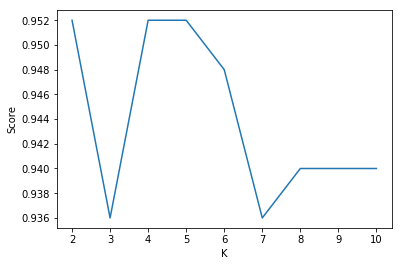

In [6]:
results = []
for k in range(2, 11):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    results.append(knn.score(x_test, y_test))
plt.plot(range(2, 11), results)
plt.xlabel('K')
plt.ylabel('Score')

In [7]:
# when k equals to 2, the score is maxmium
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(x_train, y_train)
print(knn.score(x_test, y_test))

0.952


# Correlation Analysis

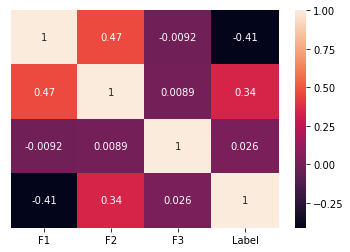

In [8]:
data = pd.DataFrame(np.hstack([normSet, np.array(Label).reshape(-1,1)]), columns = ['F1','F2','F3','Label'])
sns.heatmap(data.corr(),annot=True,yticklabels=False, xticklabels=True)

In [9]:
# Just use the first two features
knn = KNeighborsClassifier()
knn.fit(x_train[:,:2], y_train)
print(classification_report(knn.predict(x_test[:,:2]), y_test))
knn.score(x_test[:,:2], y_test)

              precision    recall  f1-score   support

           1       0.98      0.96      0.97        91
           2       0.95      0.96      0.96        81
           3       0.95      0.96      0.96        78

   micro avg       0.96      0.96      0.96       250
   macro avg       0.96      0.96      0.96       250
weighted avg       0.96      0.96      0.96       250



0.96

Text(0, 0.5, 'Score')

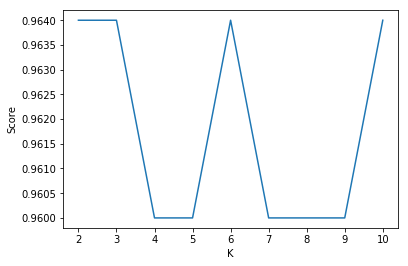

In [10]:
results = []
for k in range(2, 11):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train[:,:2], y_train)
    results.append(knn.score(x_test[:,:2], y_test))
plt.plot(range(2, 11), results)
plt.xlabel('K')
plt.ylabel('Score')

In [11]:
# when k equals to 2, the score is maxmium
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(x_train[:,:2], y_train)
print(knn.score(x_test[:,:2], y_test))

0.964
